#1. Import the libraries and load the dataset

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D
from keras.datasets import mnist
from keras.utils import np_utils
from keras import backend as K

In [2]:
#Split the data to the train and test set
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

#2. Preprocessing the data

Reshape image truoc khi cho vao CNN model

In [3]:
y_train[0]

5

In [4]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train = X_train / 255.
X_test = X_test / 255.

In [5]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [6]:
X_train.shape

(60000, 28, 28, 1)

One hot encoding label for y

In [7]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print('Dữ liệu y ban đầu ', y_train[0])
print('Dữ liệu y sau one-hot encoding ',Y_train[0])

Dữ liệu y ban đầu  5
Dữ liệu y sau one-hot encoding  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


#3. Create the model

In [11]:
#Create the model
model = Sequential()
model.add(Conv2D(32, 3, activation = "relu", input_shape = (28, 28, 1)))
model.add(Conv2D(64, 3, activation = "relu"))
model.add(MaxPool2D())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [12]:
#Compile the model
model.compile(loss = "categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adadelta(),
              metrics = ["accuracy"])

In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_2 (Flatten)         (None, 9216)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2359552   
                                                      

In [14]:
#Fit the model
history1 = model.fit(X_train,
                     Y_train,
                     batch_size = 32,
                     epochs = 10,
                     validation_data = (X_test, Y_test))

Epoch 1/10
1875/1875 [==============================] - 27s 10ms/step - loss: 2.2367 - accuracy: 0.2790 - val_loss: 2.1233 - val_accuracy: 0.6469
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 1.9869 - accuracy: 0.5539 - val_loss: 1.7449 - val_accuracy: 0.7786
Epoch 3/10
1875/1875 [==============================] - 18s 9ms/step - loss: 1.5454 - accuracy: 0.6753 - val_loss: 1.1947 - val_accuracy: 0.8254
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 1.1058 - accuracy: 0.7318 - val_loss: 0.8053 - val_accuracy: 0.8483
Epoch 5/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.8547 - accuracy: 0.7672 - val_loss: 0.6162 - val_accuracy: 0.8631
Epoch 6/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.7214 - accuracy: 0.7908 - val_loss: 0.5203 - val_accuracy: 0.8731
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.6489 - accuracy: 0.8080 - val_loss: 0.4646 - val

In [15]:
#Evaluate the model
model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.3810 - accuracy: 0.8954


[0.38100066781044006, 0.8953999876976013]

The model got 89,5% accuracy(not so high)

Build another model to improve the accuracy

In [17]:
from tensorflow.python.ops.gen_math_ops import Max
model2 = Sequential()
model2.add(Conv2D(32, 3, activation = "relu", input_shape = (28, 28, 1)))
model2.add(Conv2D(32, 3, activation = "relu"))
model2.add(MaxPool2D())
model2.add(Flatten())
model2.add(Dense(128, activation = "relu"))
model2.add(Dense(10, activation = "softmax"))

In [18]:
#Compile the model
model2.compile(loss = "categorical_crossentropy",
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["accuracy"])

In [19]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 4608)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               589952    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                      

In [21]:
hist2 = model2.fit(X_train,
                   Y_train,
                   epochs = 10,
                   batch_size = 32,
                   validation_data = (X_test, Y_test))

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1178 - accuracy: 0.9629 - val_loss: 0.0467 - val_accuracy: 0.9844
Epoch 2/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0393 - accuracy: 0.9874 - val_loss: 0.0325 - val_accuracy: 0.9902
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0242 - accuracy: 0.9925 - val_loss: 0.0327 - val_accuracy: 0.9902
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0164 - accuracy: 0.9945 - val_loss: 0.0336 - val_accuracy: 0.9904
Epoch 5/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0121 - accuracy: 0.9959 - val_loss: 0.0338 - val_accuracy: 0.9891
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0087 - accuracy: 0.9969 - val_loss: 0.0428 - val_accuracy: 0.9896
Epoch 7/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0087 - accuracy: 0.9972 - val_loss: 0.0379 - v

#4. Evaluate the model

Plot loss and accuracy of the model

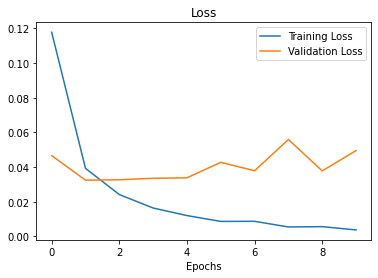

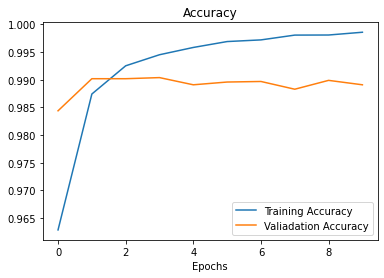

In [23]:
epochs = 10
acc = hist2.history["accuracy"]
loss = hist2.history["loss"]

val_acc = hist2.history["val_accuracy"]
val_loss = hist2.history["val_loss"]

#Plot the loss
plt.plot(np.arange(epochs), loss, label = "Training Loss")
plt.plot(np.arange(epochs), val_loss, label = "Validation Loss")
plt.title("Loss")
plt.xlabel("Epochs")
plt.legend()
#Plot the accuracy
plt.figure()
plt.plot(np.arange(epochs), acc, label = "Training Accuracy")
plt.plot(np.arange(epochs), val_acc, label = "Valiadation Accuracy")
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.legend()

In [26]:
score = model2.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.04956614598631859, 0.9890999794006348]


Predict the image

In [28]:
X_test[0].shape

(28, 28, 1)

Gia tri du doan: 7


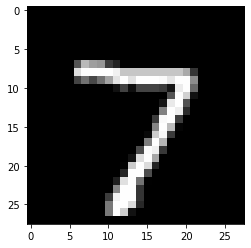

In [29]:
plt.imshow(X_test[0].reshape(28, 28), cmap = "gray")
y_pred = model2.predict(X_test[0].reshape(1, 28, 28, 1))
print(f"Gia tri du doan: {np.argmax(y_pred)}")

Save the model

In [30]:
model2.save("mnist.h5")